# The Sparks Foundation - GRIP August Task 3

## Exploratory Data Analysis - Retail

### Importing Importatnt libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing data from csv file to pandas dataframe named df

In [2]:
df = pd.read_csv("Datasets/SampleSuperstore.csv")
df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


### Checking for uniques values i.e. listing countries in the country column of avaiable dataset

In [3]:
df['Country'].unique()

array(['United States'], dtype=object)

### Since there is only 1 country, this information is redundant/unnecessary. For the same reason country column is dropped

In [4]:
df.drop('Country', axis=1, inplace=True)
df.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### Using describe function to get statistics like, min, max, count, quartiles, and etc of the entire data

In [5]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Using info function to check nulls and data types of dataframe columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   City          9994 non-null   object 
 3   State         9994 non-null   object 
 4   Postal Code   9994 non-null   int64  
 5   Region        9994 non-null   object 
 6   Category      9994 non-null   object 
 7   Sub-Category  9994 non-null   object 
 8   Sales         9994 non-null   float64
 9   Quantity      9994 non-null   int64  
 10  Discount      9994 non-null   float64
 11  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(7)
memory usage: 937.1+ KB


### Checking dataframe for Nan(s)

In [7]:
df.isna().sum()

Ship Mode       0
Segment         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### Grouping data on the basis of shipping mode

In [8]:
ship_mode_count = df.groupby('Ship Mode').count()
ship_mode = ship_mode_count.index
ship_mode_count.head()

,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
Ship Mode,,,,,,,,,,,
First Class,1538,1538,1538,1538,1538,1538,1538,1538,1538,1538,1538
Same Day,543,543,543,543,543,543,543,543,543,543,543
Second Class,1945,1945,1945,1945,1945,1945,1945,1945,1945,1945,1945
Standard Class,5968,5968,5968,5968,5968,5968,5968,5968,5968,5968,5968


### This grouped data is then plotted for easier analysis. It can be infered that the standard class is the most frquently used shipping mode and same day is the least preffered mode.

Text(0, 0.5, 'Frequency')

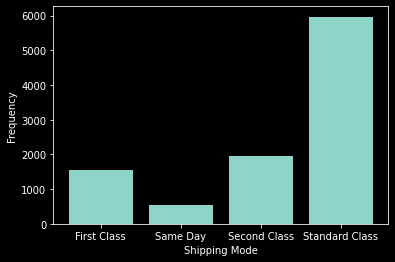

In [9]:
plt.bar(ship_mode, ship_mode_count['Quantity'])
plt.xticks(ship_mode)
plt.xlabel('Shipping Mode')
plt.ylabel('Frequency')

### **Hypothesis**: Standard being the most frequently used should be generating the maxiumum profit and same day being the least minimum

### We plot sales and profit on secondary Y axis on frequency and total quantity data which is plotted on the primary Y axis. This plot confirms our hypothesis.

                Postal Code         Sales  Quantity  Discount       Profit
Ship Mode                                                                 
First Class        84229511  3.514284e+05      5693    253.17   48969.8399
Same Day           31242093  1.283631e+05      1960     82.75   15891.7589
Second Class      108192588  4.591936e+05      7423    270.15   57446.6354
Standard Class    327908460  1.358216e+06     22797    955.02  164088.7875


/tmp/ipykernel_18777/936990866.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ship_mode)


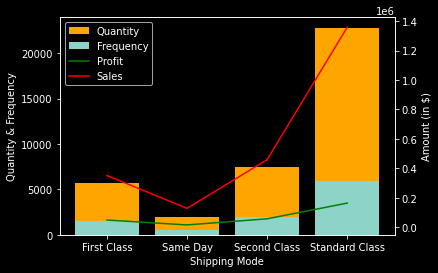

In [10]:
ship_mode_sum = df.groupby('Ship Mode').sum()
print(ship_mode_sum)

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(ship_mode, ship_mode_sum['Quantity'], color='orange', label='Quantity')
ax1.bar(ship_mode, ship_mode_count['Quantity'], label='Frequency')
ax2.plot(ship_mode, ship_mode_sum['Profit'], color='green', label='Profit')
ax2.plot(ship_mode, ship_mode_sum['Sales'], color='red', label='Sales')

ax1.set_xlabel('Shipping Mode')
ax1.set_ylabel('Quantity & Frequency')
ax2.set_ylabel('Amount (in $)')
ax1.set_xticklabels(ship_mode)

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

lines = lines_1 + lines_2
labels = labels_1 + labels_2

ax1.legend(lines, labels, loc=0)

### Grouping data on the basis of type of consumer

In [11]:
segment_count = df.groupby('Segment').count()
segment = segment_count.index
segment_count.head()

,Ship Mode,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
Segment,,,,,,,,,,,
Consumer,5191,5191,5191,5191,5191,5191,5191,5191,5191,5191,5191
Corporate,3020,3020,3020,3020,3020,3020,3020,3020,3020,3020,3020
Home Office,1783,1783,1783,1783,1783,1783,1783,1783,1783,1783,1783


### Similar to above trend we assume that the most frequently ordering type of consumer must be generating the maxiumum profit.

### We plot frequency & total quantity of orders on the primary Y axis and sales & profit on secondary Y axis.

             Postal Code         Sales  Quantity  Discount       Profit
Segment                                                                
Consumer       288878609  1.161401e+06     19521    820.91  134119.2092
Corporate      164536330  7.061464e+05     11608    477.85   91979.1340
Home Office     98157713  4.296531e+05      6744    262.33   60298.6785


/tmp/ipykernel_18777/569991104.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(segment)


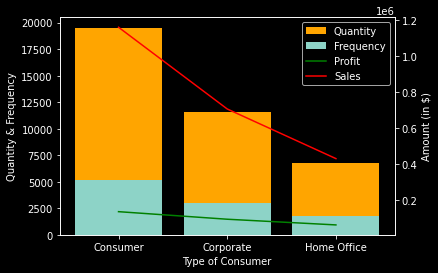

In [12]:
segment_sum = df.groupby('Segment').sum()
print(segment_sum)

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(segment, segment_sum['Quantity'], color='orange', label='Quantity')
ax1.bar(segment, segment_count['Quantity'], label='Frequency')
ax2.plot(segment, segment_sum['Profit'], color='green', label='Profit')
ax2.plot(segment, segment_sum['Sales'], color='red', label='Sales')

ax1.set_xlabel('Type of Consumer')
ax1.set_ylabel('Quantity & Frequency')
ax2.set_ylabel('Amount (in $)')
ax1.set_xticklabels(segment)

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

lines = lines_1 + lines_2
labels = labels_1 + labels_2

ax1.legend(lines, labels, loc=0)

### **The above plot confirms our hypothesis**

### Grouping data on the basis of US states

In [13]:
state_count = df.groupby('State').count()
state = state_count.index
state_count.head()

,Ship Mode,Segment,City,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
State,,,,,,,,,,,
Alabama,61,61,61,61,61,61,61,61,61,61,61
Arizona,224,224,224,224,224,224,224,224,224,224,224
Arkansas,60,60,60,60,60,60,60,60,60,60,60
California,2001,2001,2001,2001,2001,2001,2001,2001,2001,2001,2001
Colorado,182,182,182,182,182,182,182,182,182,182,182


### Similar to above trend we assume that the most frequently ordering states must be generating the maxiumum profit.

### We plot frequency & total quantity of orders on the primary Y axis and sales & profit on secondary Y axis.

            Postal Code        Sales  Quantity  Discount      Profit
State                                                               
Alabama         2195669   19510.6400       256       0.0   5786.8253
Arizona        19102126   35282.0010       862      68.0  -3427.9246
Arkansas        4339309   11678.1300       240       0.0   4008.6871
California    184382639  457687.6315      7667     145.6  76381.3871
Colorado       14613828   32108.1180       693      57.6  -6527.8579


/tmp/ipykernel_18777/3811959980.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(state, rotation=90)


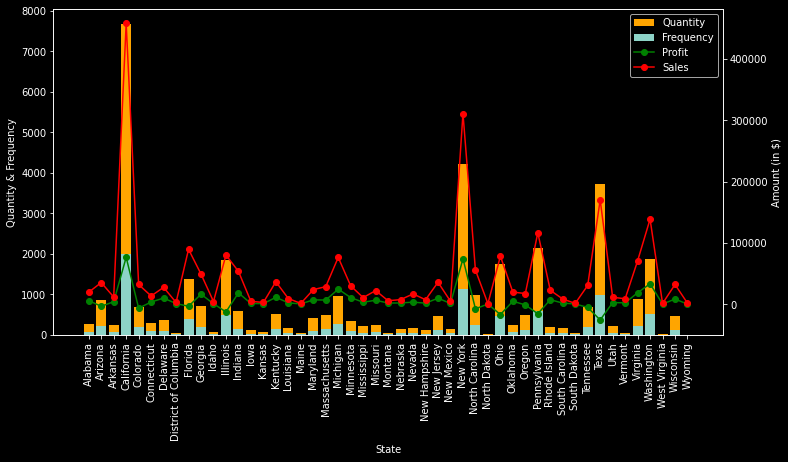

In [14]:
state_sum = df.groupby('State').sum()
print(state_sum.head())

fig, ax1 = plt.subplots()
fig.set_size_inches(12, 6)

ax2 = ax1.twinx()

ax1.bar(state, state_sum['Quantity'], color='orange', label='Quantity')
ax1.bar(state, state_count['Quantity'], label='Frequency')
ax2.plot(state, state_sum['Profit'],marker='o', color='green', label='Profit')
ax2.plot(state, state_sum['Sales'],marker='o', color='red', label='Sales')

ax1.set_xlabel('State')
ax1.set_ylabel('Quantity & Frequency')
ax2.set_ylabel('Amount (in $)')
ax1.set_xticklabels(state, rotation=90)

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

lines = lines_1 + lines_2
labels = labels_1 + labels_2

ax1.legend(lines, labels, loc=0)

### Though our hypothesis is mostly true, there are some anomolies. Like

#### States with profit lower then expected:
* Arizona
* Floride
* Illinois
* Ohio
* Pennsylvania
* Texas

#### States with profit higher then expected:
* Connecticut
* Delaware
* District of Columbia
* Idaho
* North Dakota

#### States with huge difference
* California
* New York
* Washington 

#### We shall take a closer look at these states later

### Grouping data on the basis of Regions of USA

In [15]:
region_count = df.groupby('Region').count()
region = region_count.index
region_count.head()

,Ship Mode,Segment,City,State,Postal Code,Category,Sub-Category,Sales,Quantity,Discount,Profit
Region,,,,,,,,,,,
Central,2323,2323,2323,2323,2323,2323,2323,2323,2323,2323,2323
East,2848,2848,2848,2848,2848,2848,2848,2848,2848,2848,2848
South,1620,1620,1620,1620,1620,1620,1620,1620,1620,1620,1620
West,3203,3203,3203,3203,3203,3203,3203,3203,3203,3203,3203


### Similar to above trend we assume that the most frequently ordering regions must be generating the maxiumum profit.

### We plot sales and profit on secondary Y axis on frequency and total quantity data which is plotted on the primary Y axis. This plot confirms our hypothesis.

         Postal Code        Sales  Quantity  Discount       Profit
Region                                                            
Central    151786150  501239.8908      8780    558.34   39706.3625
East        50171698  678781.2400     10618    414.00   91522.7800
South       55875052  391721.9050      6209    238.55   46749.4303
West       293739752  725457.8245     12266    350.20  108418.4489


/tmp/ipykernel_18777/2395866317.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(region)


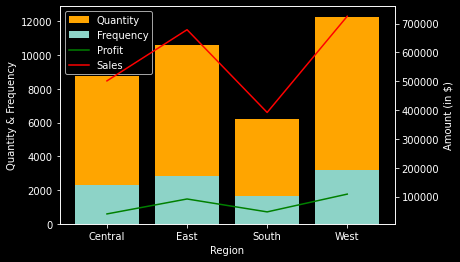

In [16]:
region_sum = df.groupby('Region').sum()
print(region_sum.head())

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(region, region_sum['Quantity'], color='orange', label='Quantity')
ax1.bar(region, region_count['Quantity'], label='Frequency')
ax2.plot(region, region_sum['Profit'], color='green', label='Profit')
ax2.plot(region, region_sum['Sales'], color='red', label='Sales')

ax1.set_xlabel('Region')
ax1.set_ylabel('Quantity & Frequency')
ax2.set_ylabel('Amount (in $)')
ax1.set_xticklabels(region)

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

lines = lines_1 + lines_2
labels = labels_1 + labels_2

ax1.legend(lines, labels, loc=0)

### Grouping data on the basis of category of product

In [17]:
category_count = df.groupby('Category').count()
category = category_count.index
category_count.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Sub-Category,Sales,Quantity,Discount,Profit
Category,,,,,,,,,,,
Furniture,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121
Office Supplies,6026,6026,6026,6026,6026,6026,6026,6026,6026,6026,6026
Technology,1847,1847,1847,1847,1847,1847,1847,1847,1847,1847,1847


### Similar to above trend we assume that the most frequently ordered category must be generating the maxiumum profit.

### We plot sales and profit on secondary Y axis on frequency and total quantity data which is plotted on the primary Y axis. This plot confirms our hypothesis.

                 Postal Code        Sales  Quantity  Discount       Profit
Category                                                                  
Furniture          118196026  741999.7953      8028    368.89   18451.2728
Office Supplies    330772872  719047.0320     22906    947.80  122490.8008
Technology         102603754  836154.0330      6939    244.40  145454.9481


/tmp/ipykernel_18777/1481029785.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(category)


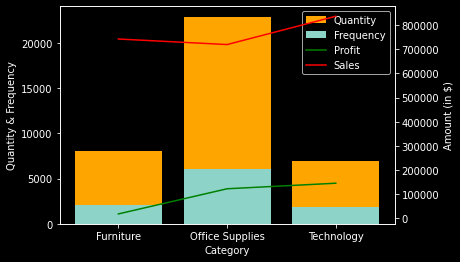

In [18]:
category_sum = df.groupby('Category').sum()
print(category_sum.head())

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(category, category_sum['Quantity'], color='orange', label='Quantity')
ax1.bar(category, category_count['Quantity'], label='Frequency')
ax2.plot(category, category_sum['Profit'], color='green', label='Profit')
ax2.plot(category, category_sum['Sales'], color='red', label='Sales')

ax1.set_xlabel('Category')
ax1.set_ylabel('Quantity & Frequency')
ax2.set_ylabel('Amount (in $)')
ax1.set_xticklabels(category)

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

lines = lines_1 + lines_2
labels = labels_1 + labels_2

ax1.legend(lines, labels, loc=0)

### It can be observed from the above graph that office supplies have highest frequency, number of orders and sales. Yet the profit made from it is less, and on the contrary technology which has the lowest frequency and total unit sales earns the maximum profit.

### It can also be noted that the sales value and profit both are at peak for technology products.

### **Hypothesis**: The average cost of technology products are higher and more profitable compared to others, hence generating more value.

In [19]:
category_mean = df.groupby('Category').mean()
category_mean

,Postal Code,Sales,Quantity,Discount,Profit
Category,,,,,
Furniture,55726.556341,349.834887,3.785007,0.173923,8.699327
Office Supplies,54890.951211,119.324101,3.801195,0.157285,20.327050
Technology,55551.572279,452.709276,3.756903,0.132323,78.752002


### Our hypothesis is confirmed since the average number of orders for all 3 types of products are nearly equal, the average sales of technology is significantly high and that of office supplies is drastically less. Incase of profit tech products are again most profitable and furnitute being the least.

### We can safetly say that technology is the highest revenue generating category

### We can get a better understanding of why is this so by analysing profit based on sub-category of products in detail.

### Grouping data on the basis of sub-category of product

In [20]:
sub_category_count = df.groupby('Sub-Category').count()
sub_category = sub_category_count.index
sub_category_count.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sales,Quantity,Discount,Profit
Sub-Category,,,,,,,,,,,
Accessories,775,775,775,775,775,775,775,775,775,775,775
Appliances,466,466,466,466,466,466,466,466,466,466,466
Art,796,796,796,796,796,796,796,796,796,796,796
Binders,1523,1523,1523,1523,1523,1523,1523,1523,1523,1523,1523
Bookcases,228,228,228,228,228,228,228,228,228,228,228


### Similar to above trend we assume that the most frequently ordered sub-category must be generating the maxiumum profit.

### We plot sales and profit on secondary Y axis on frequency and total quantity data which is plotted on the primary Y axis. This plot confirms our hypothesis.

              Postal Code        Sales  Quantity  Discount      Profit
Sub-Category                                                          
Accessories      44468434  167380.3180      2976     60.80  41936.6357
Appliances       25250538  107532.1610      1729     77.60  18138.0054
Art              43329658   27118.7920      3000     59.60   6527.7870
Binders          83626398  203412.7330      5974    567.00  30221.7633
Bookcases        12771539  114879.9963       868     48.14  -3472.5560
Chairs           34936229  328449.1030      2356    105.00  26590.1663
Copiers           3873477  149528.0300       234     11.00  55617.8249
Envelopes        13325731   16476.4020       906     20.40   6964.1767
Fasteners        12506063    3024.2800       914     17.80    949.5182
Furnishings      51880430   91705.1640      3563    132.40  13059.1436
Labels           19552985   12486.3120      1400     25.00   5546.2540
Machines          6364668  189238.6310       440     35.20   3384.7569
Paper 

/tmp/ipykernel_18777/64913895.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sub_category, rotation=90)


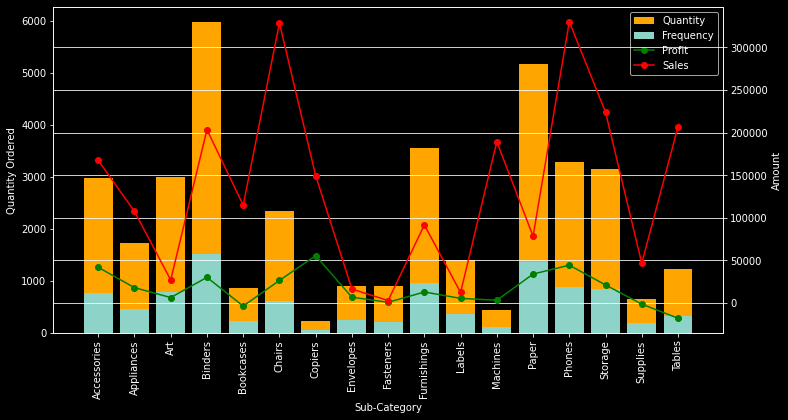

In [21]:
sub_category_sum = df.groupby('Sub-Category').sum()
print(sub_category_sum)

fig, ax1 = plt.subplots()
fig.set_size_inches(12, 6)

ax2 = ax1.twinx()

ax1.bar(sub_category, sub_category_sum['Quantity'], color='orange', label='Quantity')
ax1.bar(sub_category, sub_category_count['Quantity'], label='Frequency')
ax2.plot(sub_category, sub_category_sum['Profit'],marker='o', color='green', label='Profit')
ax2.plot(sub_category, sub_category_sum['Sales'],marker='o', color='red', label='Sales')

ax1.set_xlabel('Sub-Category')
ax1.set_ylabel('Quantity Ordered')
ax2.set_ylabel('Amount')
ax1.set_xticklabels(sub_category, rotation=90)
ax2.grid()

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

lines = lines_1 + lines_2
labels = labels_1 + labels_2

ax1.legend(lines, labels, loc=0)

### From this plot it can be seen that sub-categories like bookcases, supplies and especially tables are responsible for losses.

### Products like Fastners do not have a huge profit margin and only contributes a fraction amount to net profit.

### Products like Copiers and Paper are profiting, have a higher profit margin since the net sales value dips but net profit value is better then the trend. Copiers, accessories, paper and phones are responsible for most of the profit earned.

### Now coming back to states with lower profits then expected

Graphs for state with lesser profit then expected:


/tmp/ipykernel_18777/1880783700.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sub_category, rotation=90)
/tmp/ipykernel_18777/1880783700.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sub_category, rotation=90)
/tmp/ipykernel_18777/1880783700.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sub_category, rotation=90)
/tmp/ipykernel_18777/1880783700.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sub_category, rotation=90)
/tmp/ipykernel_18777/1880783700.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sub_category, rotation=90)
/tmp/ipykernel_18777/1880783700.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sub_category, rotation=90)


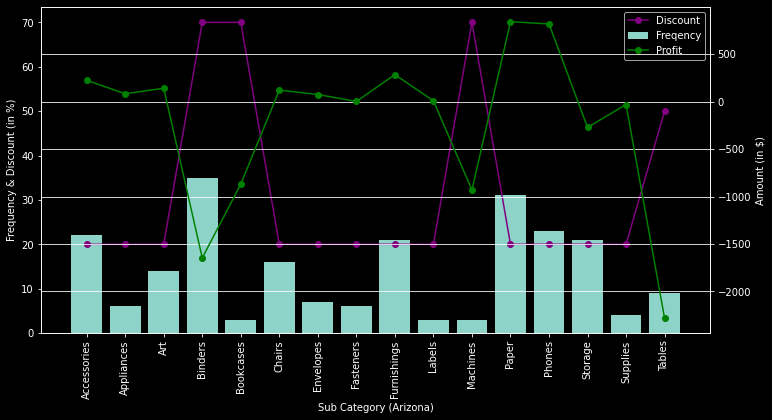

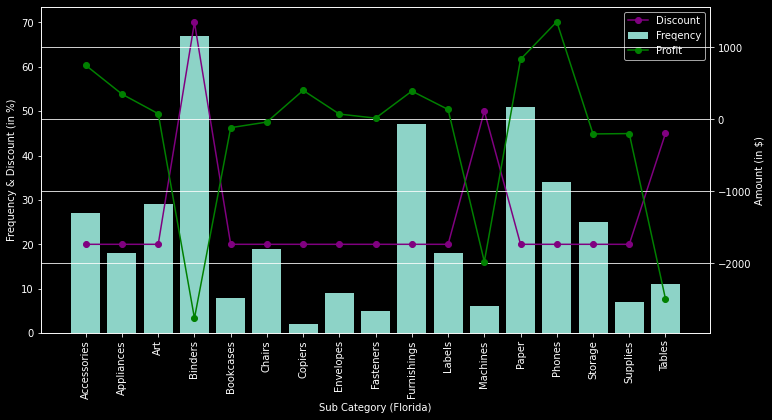

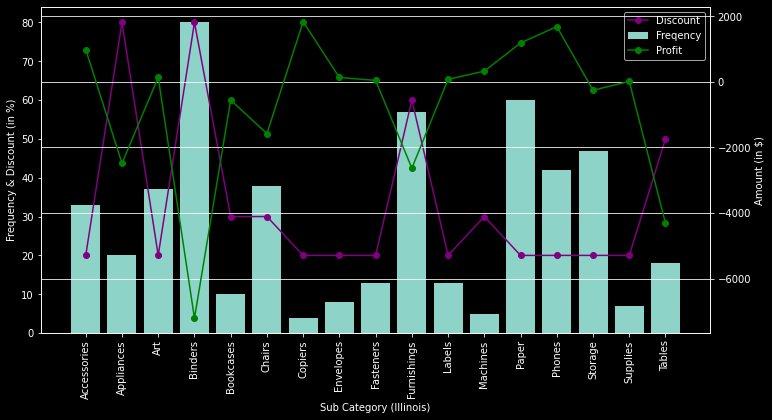

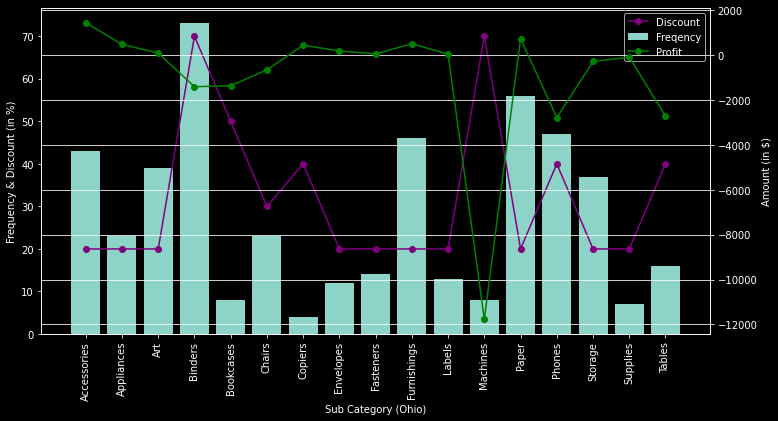

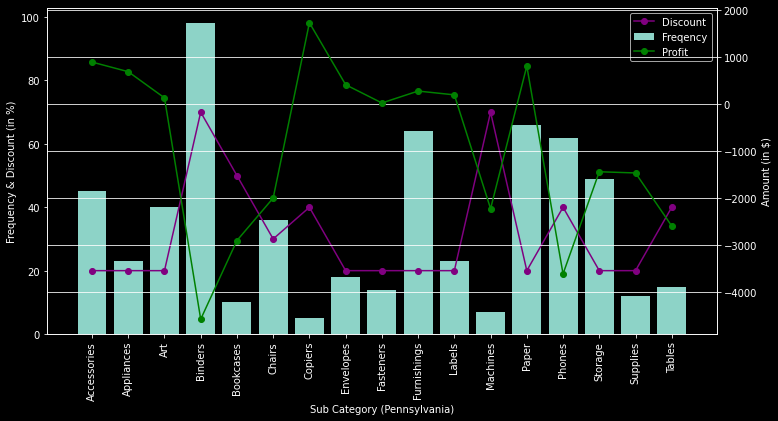

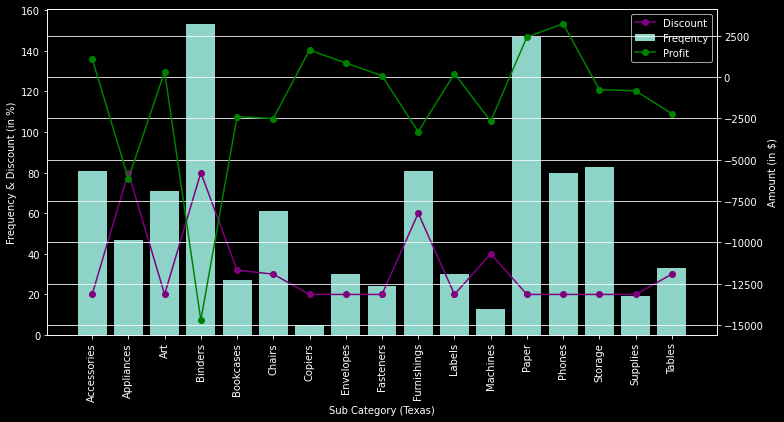

In [22]:
lower_then_expected = ['Arizona', 'Florida', 'Illinois', 'Ohio', 'Pennsylvania', 'Texas']
print("Graphs for state with lesser profit then expected:")
for state in lower_then_expected:
    sub_category_count = df[df['State'] == state].groupby('Sub-Category').count()
    sub_category = sub_category_count.index
    sub_category_sum = df[df['State'] == state].groupby('Sub-Category').sum()
    sub_category_mean = df[df['State'] == state].groupby('Sub-Category').mean()
    sub_category_mean['Discount'] *= 100

    fig, ax1 = plt.subplots()
    fig.set_size_inches(12, 6)

    ax2 = ax1.twinx()

    ax1.bar(sub_category, sub_category_count['Quantity'], label='Freqency')
    ax1.plot(sub_category, sub_category_mean['Discount'],marker='o', color='purple', label='Discount')
    ax2.plot(sub_category, sub_category_sum['Profit'],marker='o', color='green', label='Profit')

    ax1.set_xlabel('Sub Category ('+state+')')
    ax1.set_ylabel('Frequency & Discount (in %)')
    ax2.set_ylabel('Amount (in $)')
    ax1.set_xticklabels(sub_category, rotation=90)
    ax2.grid()

    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()

    lines = lines_1 + lines_2
    labels = labels_1 + labels_2

    ax1.legend(lines, labels, loc=0)

### It is observed that these states are generating less revenue since they are suffering huge losses which is becuase of offering huge amount of discount (upto 80%)

### Now coming back to states with greater profits then expected

Graphs for state with greater profit then expected:


/tmp/ipykernel_18777/3074733139.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sub_category, rotation=90)
/tmp/ipykernel_18777/3074733139.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sub_category, rotation=90)
/tmp/ipykernel_18777/3074733139.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sub_category, rotation=90)
/tmp/ipykernel_18777/3074733139.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sub_category, rotation=90)
/tmp/ipykernel_18777/3074733139.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sub_category, rotation=90)


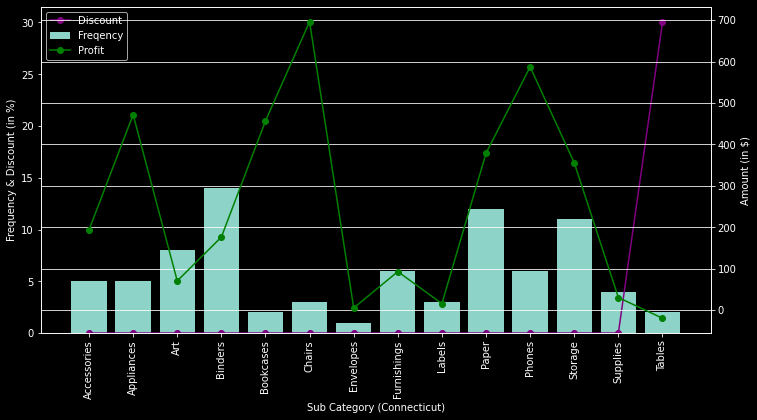

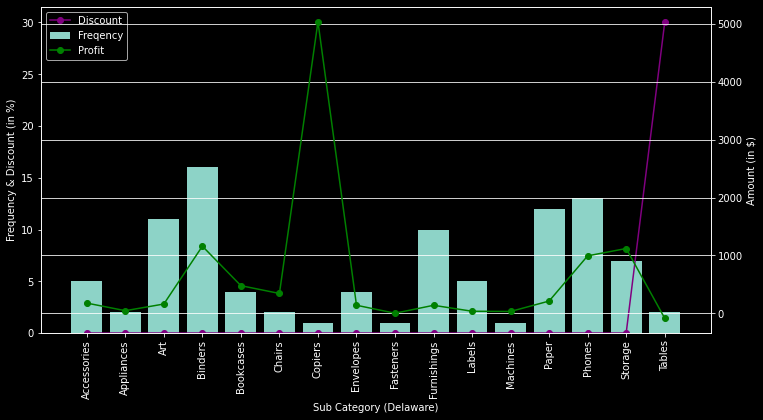

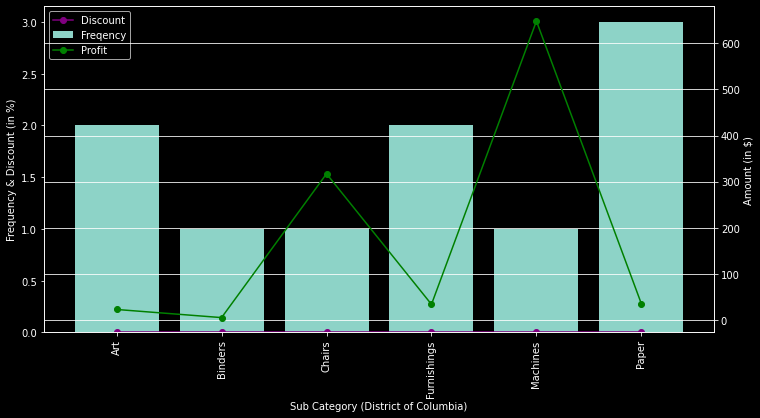

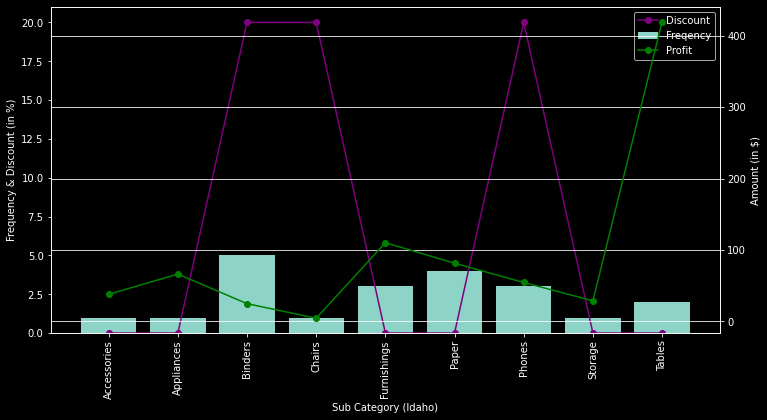

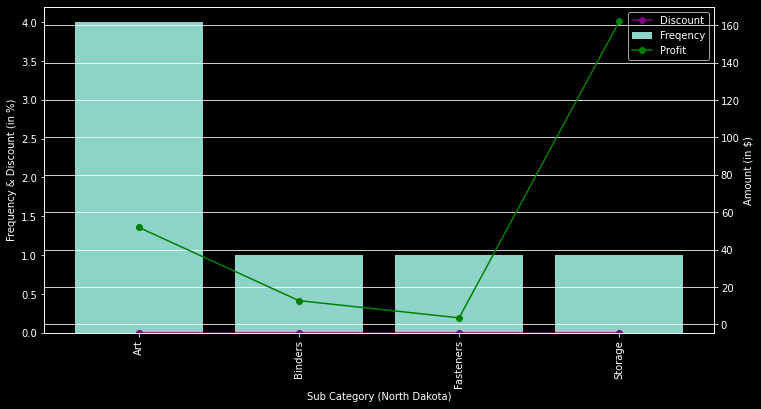

In [23]:
higher_then_expected = ['Connecticut', 'Delaware', 'District of Columbia', 'Idaho', 'North Dakota']
print("Graphs for state with greater profit then expected:")
for state in higher_then_expected:
    sub_category_count = df[df['State'] == state].groupby('Sub-Category').count()
    sub_category = sub_category_count.index
    sub_category_sum = df[df['State'] == state].groupby('Sub-Category').sum()
    sub_category_mean = df[df['State'] == state].groupby('Sub-Category').mean()
    sub_category_mean['Discount'] *= 100

    fig, ax1 = plt.subplots()
    fig.set_size_inches(12, 6)

    ax2 = ax1.twinx()

    ax1.bar(sub_category, sub_category_count['Quantity'], label='Freqency')
    ax1.plot(sub_category, sub_category_mean['Discount'],marker='o', color='purple', label='Discount')
    ax2.plot(sub_category, sub_category_sum['Profit'],marker='o', color='green', label='Profit')

    ax1.set_xlabel('Sub Category ('+state+')')
    ax1.set_ylabel('Frequency & Discount (in %)')
    ax2.set_ylabel('Amount (in $)')
    ax1.set_xticklabels(sub_category, rotation=90)
    ax2.grid()

    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()

    lines = lines_1 + lines_2
    labels = labels_1 + labels_2

    ax1.legend(lines, labels, loc=0)

### It is observed that these states are generating more revenue since they are offering almost 0 discount

### Now coming back to states with huge gap between profits and sales

Graphs for state who have huge difference between sales and profit:


/tmp/ipykernel_18777/2953784830.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sub_category, rotation=90)
/tmp/ipykernel_18777/2953784830.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sub_category, rotation=90)
/tmp/ipykernel_18777/2953784830.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sub_category, rotation=90)
/tmp/ipykernel_18777/2953784830.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sub_category, rotation=90)


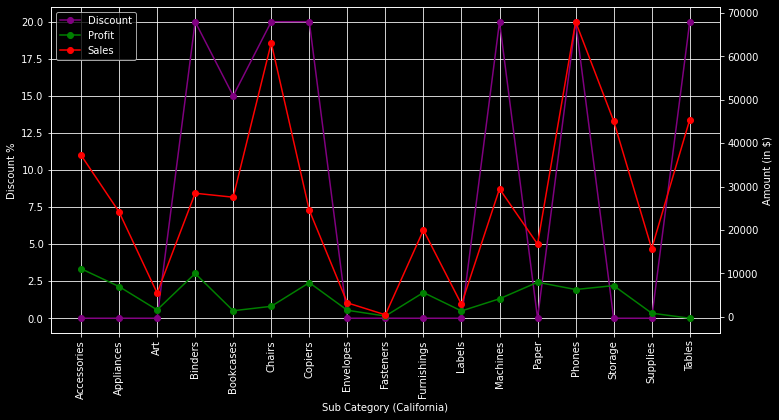

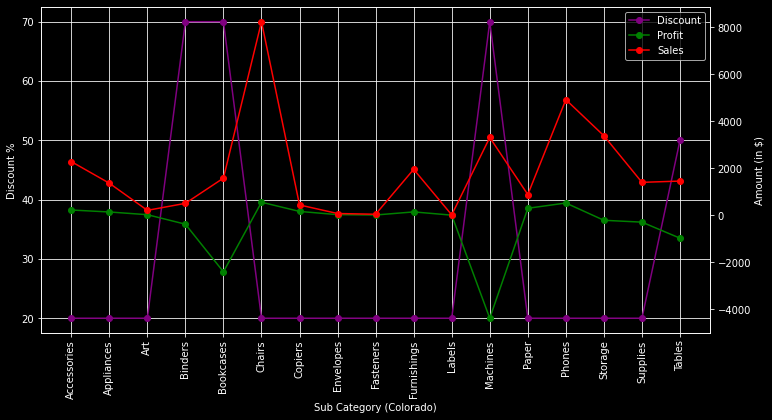

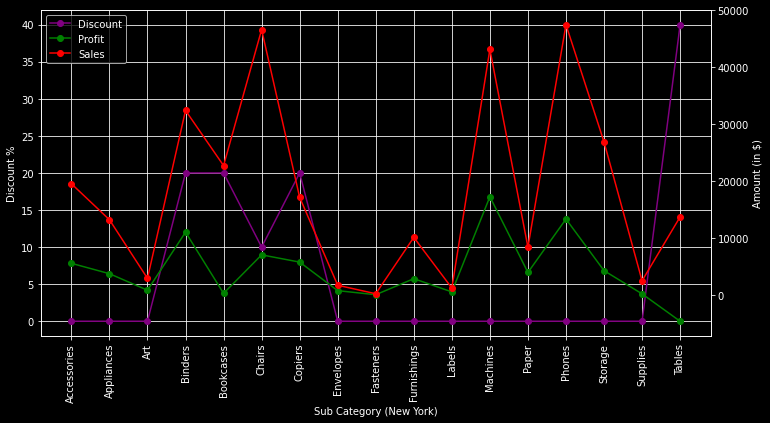

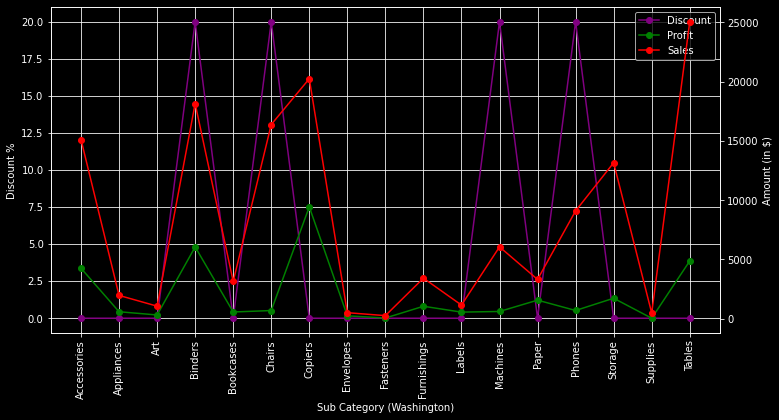

In [24]:
tbd = ['California', 'Colorado', 'New York', 'Washington']
print("Graphs for state who have huge difference between sales and profit:")
for state in tbd:
    sub_category_count = df[df['State'] == state].groupby('Sub-Category').count()
    sub_category = sub_category_count.index
    sub_category_sum = df[df['State'] == state].groupby('Sub-Category').sum()
    sub_category_mean = df[df['State'] == state].groupby('Sub-Category').mean()
    sub_category_mean['Discount'] *= 100

    fig, ax1 = plt.subplots()
    fig.set_size_inches(12, 6)

    ax2 = ax1.twinx()

    ax1.plot(sub_category, sub_category_mean['Discount'],marker='o', color='purple', label='Discount')
    ax2.plot(sub_category, sub_category_sum['Profit'],marker='o', color='green', label='Profit')
    ax2.plot(sub_category, sub_category_sum['Sales'], marker='o', color='red', label='Sales')

    ax1.set_xlabel('Sub Category ('+state+')')
    ax1.set_ylabel('Discount %')
    ax2.set_ylabel('Amount (in $)')
    ax1.set_xticklabels(sub_category, rotation=90)
    ax1.grid()

    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()

    lines = lines_1 + lines_2
    labels = labels_1 + labels_2

    ax1.legend(lines, labels, loc=0)

### It is observed that these states have huge gaps mainly but not limited to the fact that the gap is created by the products which have huge discount %, this shows that dispite sales are good due to the high discount offered the ultimate profits are marginally low.